# Convolutional Neural Network for Vision;Multi-classification with the MNIST dataset

Convolutional Neural Networks are common in computer vision applications,such as recognizing hadnwritten digits and characters, and recognizing objects in image and video. They are also used non-vision applications such as NLP and recommender systems

MNIST data set has 70000 labelled digit image samples - 60000 for training and 10000 for testing. Each sample is 28-by-28 pixels(784 total features) represented as NumPy array.

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

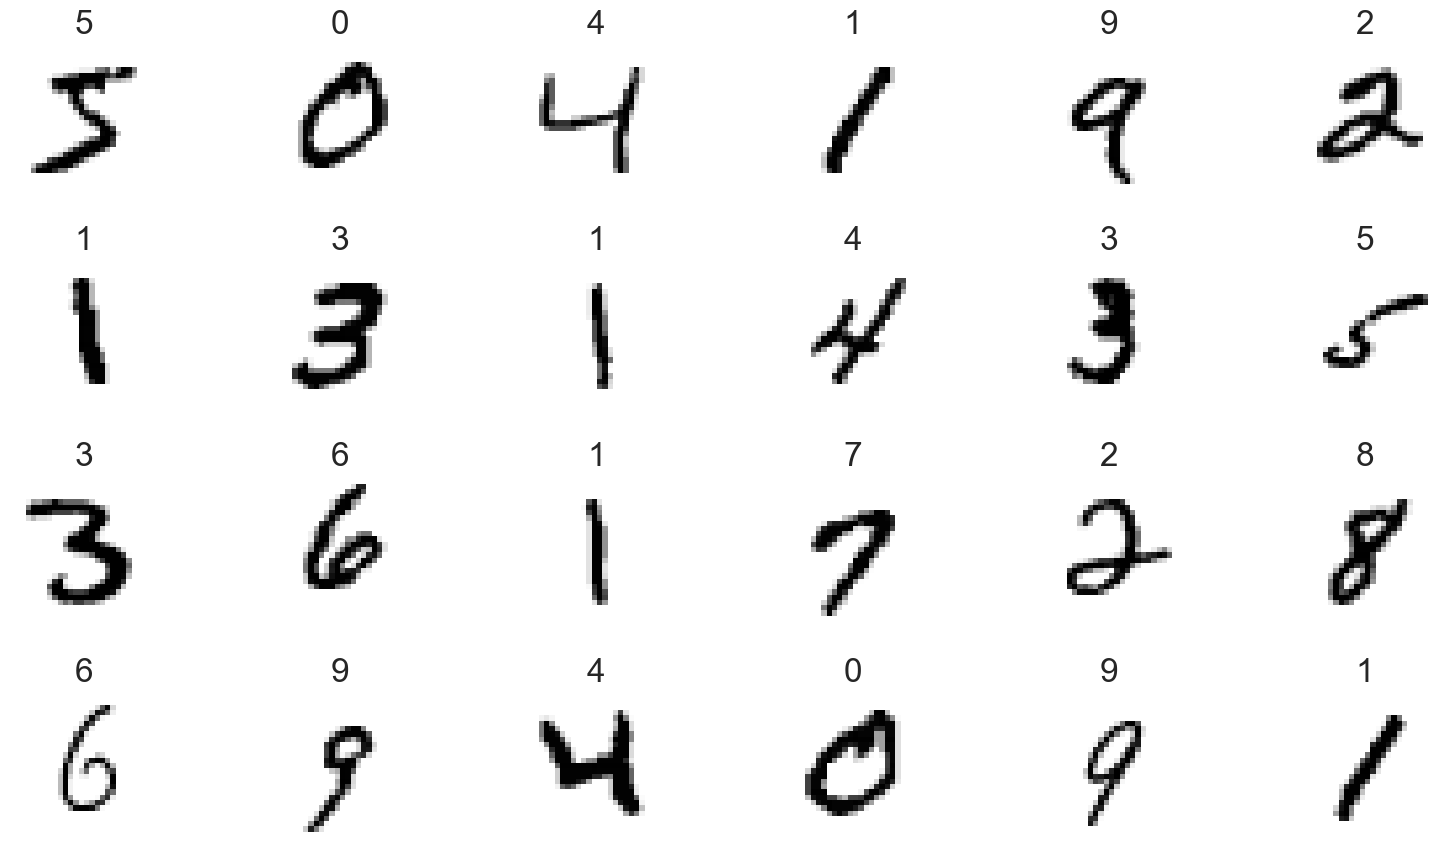

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train = X_train.astype('float32') / 255

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Flatten())

In [32]:
cnn.add(Dense(units=128, activation='relu'))

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

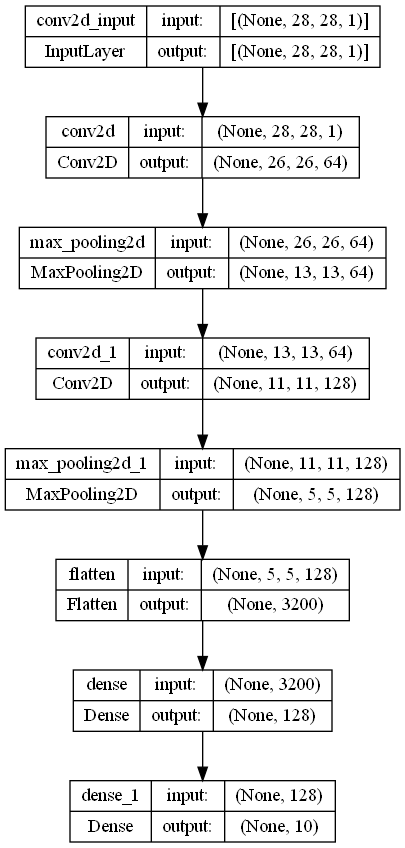

In [35]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [36]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 43s 50ms/step - loss: 0.1407 - accuracy: 0.9569 - val_loss: 0.0458 - val_accuracy: 0.9858
Epoch 2/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0527 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 44s 53ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 4/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0364 - val_accuracy: 0.9900
Epoch 5/5
844/844 [==============================] - 48s 56ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0358 - val_accuracy: 0.9900


In [38]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0285 - accuracy: 0.9908


In [39]:
loss

0.028504012152552605

In [40]:
accuracy

0.9908000230789185

In [41]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [42]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [43]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000186%
1: 0.0000000207%
2: 0.0000000195%
3: 0.0000003106%
4: 0.0000000000%
5: 0.0000000020%
6: 0.0000000000%
7: 99.9999940395%
8: 0.0000000000%
9: 0.0000042405%


In [44]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [45]:
len(incorrect_predictions)

92

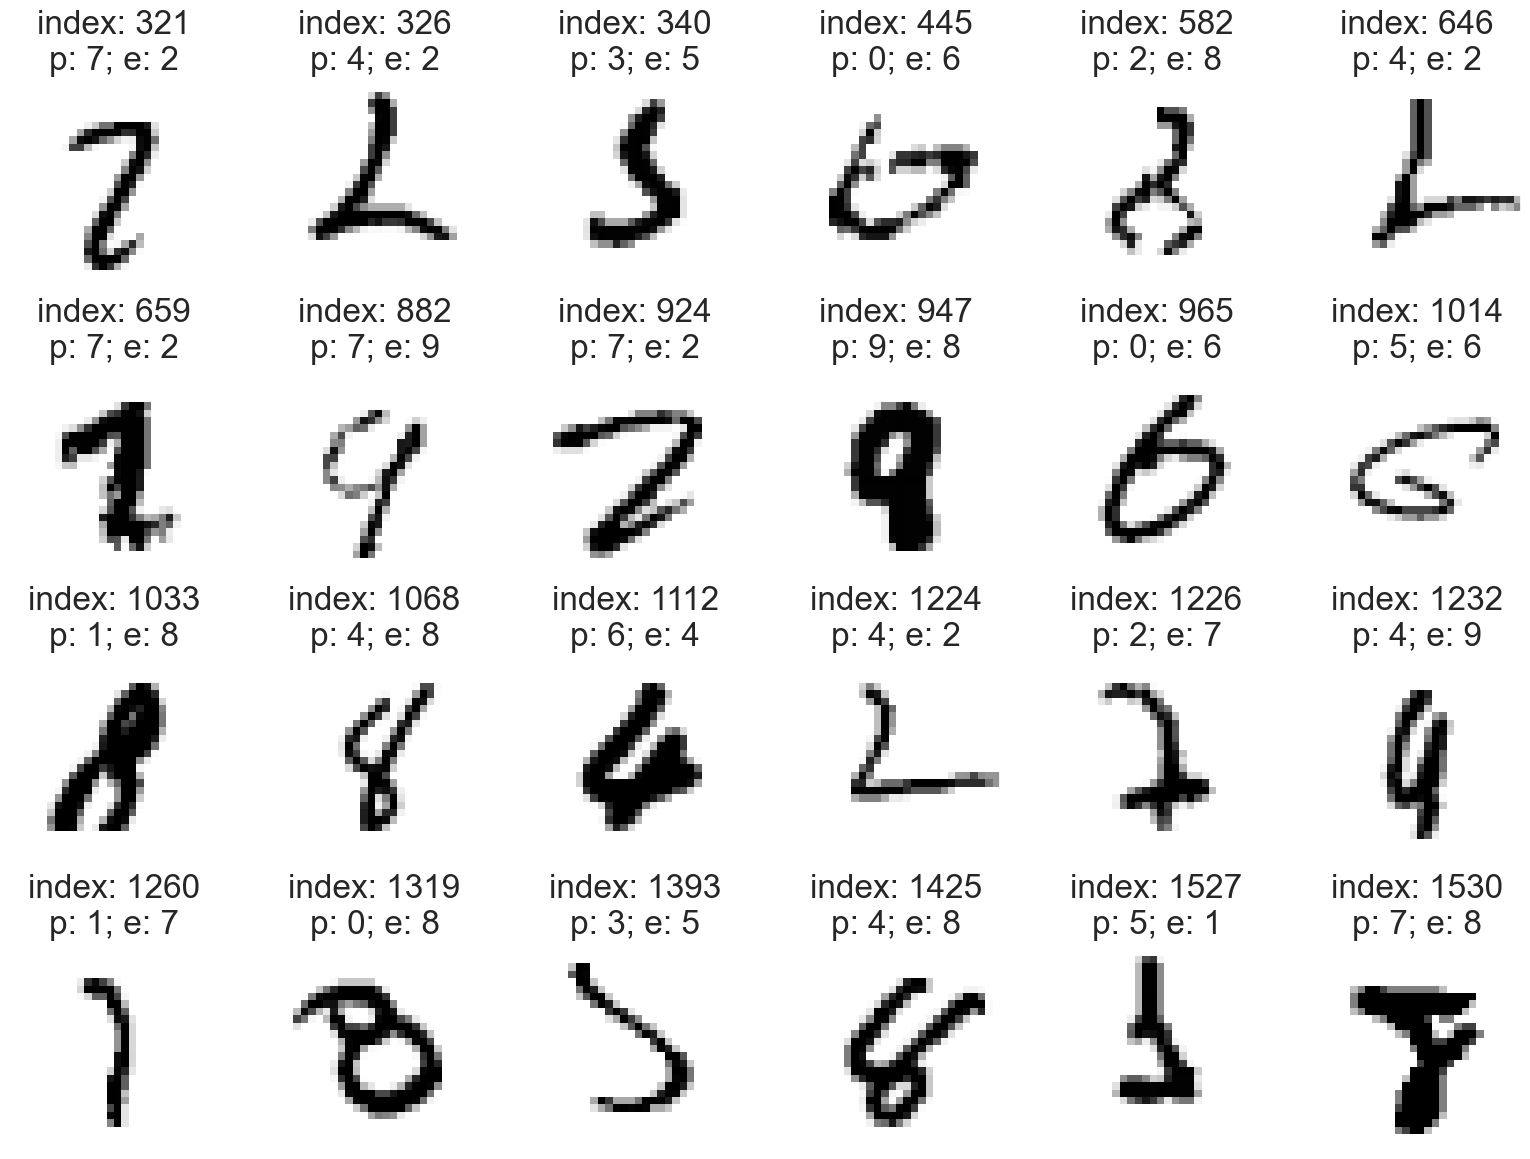

In [46]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [47]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [48]:
display_probabilities(predictions[495])

0: 11.1739158630%
1: 0.0000536680%
2: 2.6186859235%
3: 0.2143373247%
4: 0.4859739915%
5: 0.0105054351%
6: 2.8645524755%
7: 0.0000005555%
8: 79.0705263615%
9: 3.5614546388%


In [49]:
display_probabilities(predictions[583])

0: 0.0000005010%
1: 0.0000419893%
2: 60.3148102760%
3: 1.1674670503%
4: 0.0000002934%
5: 0.0000000088%
6: 0.0000000007%
7: 38.4045511484%
8: 0.1130910125%
9: 0.0000347042%


In [50]:
display_probabilities(predictions[625])

0: 0.0000345558%
1: 0.0000004425%
2: 0.0000087888%
3: 0.0000000002%
4: 15.5050724745%
5: 0.0000001485%
6: 84.4948410988%
7: 0.0000000000%
8: 0.0000005425%
9: 0.0000447699%


In [51]:
cnn.save('mnist_cnn.h5')